## Evaluation of Group Recommendation Algorithms with Aggregation Strategy: "Average"

### Loading recommendation output and test data

In [1]:
## Load Statistics
from lenskit import topn
from lenskit.metrics.topn import ndcg
import pandas as pd
from matplotlib import pyplot as plt
from lenskit.metrics.predict import rmse
from IPython.display import set_matplotlib_formats

# Item-Item Knn Collaborative Filtering
ii_recs = pd.read_csv('output/AVG/ii/recs.csv')
test_data_ii = pd.read_csv('output/AVG/ii/testdata.csv')
preds_ii = pd.read_csv('output/AVG/ii/preds.csv')

# Trust
trst_recs = pd.read_csv('output/AVG/trst/recs.csv')
test_data_trst = pd.read_csv('output/AVG/trst/testdata.csv')
preds_trst = pd.read_csv('output/AVG/trst/preds.csv')

# Social Similarity
socsim_recs = pd.read_csv('output/AVG/socsim/recs.csv')
test_data_socsim = pd.read_csv('output/AVG/socsim/testdata.csv')
preds_socsim = pd.read_csv('output/AVG/socsim/preds.csv')

# Domain Expertise
domex_recs = pd.read_csv('output/AVG/domex/recs.csv')
test_data_domex = pd.read_csv('output/AVG/domex/testdata.csv')
preds_domex = pd.read_csv('output/AVG/domex/preds.csv')

# Social Hierarchy
hierch_recs = pd.read_csv('output/AVG/hierch/recs.csv')
test_data_hierch = pd.read_csv('output/AVG/hierch/testdata.csv')
preds_hierch = pd.read_csv('output/AVG/hierch/preds.csv')

# Social Capital
socap_recs = pd.read_csv('output/AVG/socap/recs.csv')
test_data_socap = pd.read_csv('output/AVG/socap/testdata.csv')
preds_socap = pd.read_csv('output/AVG/socap/preds.csv')

# Social Context Similarity
soxsim_recs = pd.read_csv('output/AVG/soxsim/recs.csv')
test_data_soxsim = pd.read_csv('output/AVG/soxsim/testdata.csv')
preds_soxsim = pd.read_csv('output/AVG/soxsim/preds.csv')

# Sympathy
symp_recs = pd.read_csv('output/AVG/symp/recs.csv')
test_data_symp = pd.read_csv('output/AVG/symp/testdata.csv')
preds_symp = pd.read_csv('output/AVG/symp/preds.csv')

# Social Relationship
rel_recs = pd.read_csv('output/AVG/rel/recs.csv')
test_data_rel = pd.read_csv('output/AVG/rel/testdata.csv')
preds_rel = pd.read_csv('output/AVG/rel/preds.csv')

### 1. Recommendation Metrics: Normalized Discounted Cummulative Gain: nDCG

In [2]:
rla = topn.RecListAnalysis()
rla.add_metric(topn.ndcg)
rla.add_metric(topn.precision)
rla.add_metric(topn.recall)

results_ii = rla.compute(ii_recs, test_data_ii)
results_trst = rla.compute(trst_recs, test_data_trst)
results_socsim = rla.compute(socsim_recs, test_data_socsim)
results_domex = rla.compute(domex_recs, test_data_domex)
results_hierch = rla.compute(hierch_recs, test_data_hierch)
results_socap = rla.compute(socap_recs, test_data_socap)
results_soxsim = rla.compute(soxsim_recs, test_data_soxsim)
results_symp = rla.compute(symp_recs, test_data_symp)
results_rel = rla.compute(rel_recs, test_data_rel)

In [3]:
results = pd.concat([results_ii, results_trst, results_socsim, results_domex, results_hierch, results_socap, results_soxsim, results_symp, results_rel])
results.groupby('Algorithm').ndcg.mean()

Algorithm
domex     0.100849
hierch    0.102843
ii        0.062723
rel       0.116812
socap     0.094016
socsim    0.079636
soxsim    0.075332
symp      0.103969
trst      0.109668
Name: ndcg, dtype: float64

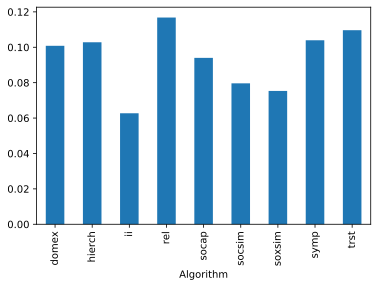

In [4]:
set_matplotlib_formats('svg')
results.groupby('Algorithm').ndcg.mean().plot.bar()

In [5]:
results.groupby('Algorithm').precision.mean()

Algorithm
domex     0.003175
hierch    0.003175
ii        0.002222
rel       0.003651
socap     0.002937
socsim    0.002778
soxsim    0.002778
symp      0.003095
trst      0.003095
Name: precision, dtype: float64

In [6]:
results.groupby('Algorithm').recall.mean()

Algorithm
domex     0.309524
hierch    0.301587
ii        0.214286
rel       0.353175
socap     0.277778
socsim    0.265873
soxsim    0.269841
symp      0.297619
trst      0.289683
Name: recall, dtype: float64

### 2. Prediction Metrics: RMSE

Item Item Knn: max rmse per user = 0.8408768007555578, min rmse per user = 0.07809004187545796, average rmse per user = 0.3244495498658247
Trust: max rmse per user = 0.8460021650901751, min rmse per user = 0.07809004187545796, average rmse per user = 0.4158169012415593
Social Similarity: max rmse per user = 0.8460021650901751, min rmse per user = 0.07809004187545796, average rmse per user = 0.41678909813556986
Domain Expertise: max rmse per user = 0.8460021650901751, min rmse per user = 0.07809004187545796, average rmse per user = 0.4145309172469042
Social Hierarchy: max rmse per user = 0.8460021650901751, min rmse per user = 0.07809004187545796, average rmse per user = 0.4156210287426404
Social Capital: max rmse per user = 0.8460021650901751, min rmse per user = 0.07809004187545796, average rmse per user = 0.41556464905934015
Social Context Similarity: max rmse per user = 0.8460021650901751, min rmse per user = 0.07809004187545796, average rmse per user = 0.41614710681523936
Sympathy:

{'whiskers': [<matplotlib.lines.Line2D at 0x128f58c50>,
 'caps': [<matplotlib.lines.Line2D at 0x128f5d6d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x128f4cf10>,
 'medians': [<matplotlib.lines.Line2D at 0x128f58d10>,
 'fliers': [<matplotlib.lines.Line2D at 0x128f62650>,
 'means': []}

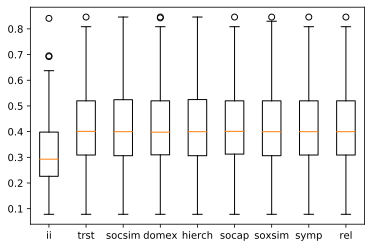

In [7]:
user_rmse_ii = (preds_ii.groupby('user').apply(lambda df: rmse(df.prediction, df.rating))).dropna()
user_rmse_trst = (preds_trst.groupby('user').apply(lambda df: rmse(df.prediction, df.rating))).dropna()
user_rmse_socsim = (preds_socsim.groupby('user').apply(lambda df: rmse(df.prediction, df.rating))).dropna()
user_rmse_domex = (preds_domex.groupby('user').apply(lambda df: rmse(df.prediction, df.rating))).dropna()
user_rmse_hierch = (preds_hierch.groupby('user').apply(lambda df: rmse(df.prediction, df.rating))).dropna()
user_rmse_socap = (preds_socap.groupby('user').apply(lambda df: rmse(df.prediction, df.rating))).dropna()
user_rmse_soxsim = (preds_soxsim.groupby('user').apply(lambda df: rmse(df.prediction, df.rating))).dropna()
user_rmse_symp = (preds_symp.groupby('user').apply(lambda df: rmse(df.prediction, df.rating))).dropna()
user_rmse_rel = (preds_rel.groupby('user').apply(lambda df: rmse(df.prediction, df.rating))).dropna()


print('Item Item Knn: max rmse per user = ' + str(user_rmse_ii.max()) + ', min rmse per user = ' + str(user_rmse_ii.min()) + ', average rmse per user = ' + str(user_rmse_ii.mean()))
print('Trust: max rmse per user = ' + str(user_rmse_trst.max()) + ', min rmse per user = ' + str(user_rmse_trst.min()) + ', average rmse per user = ' + str(user_rmse_trst.mean()))
print('Social Similarity: max rmse per user = ' + str(user_rmse_socsim.max()) + ', min rmse per user = ' + str(user_rmse_socsim.min()) + ', average rmse per user = ' + str(user_rmse_socsim.mean()))
print('Domain Expertise: max rmse per user = ' + str(user_rmse_domex.max()) + ', min rmse per user = ' + str(user_rmse_domex.min()) + ', average rmse per user = ' + str(user_rmse_domex.mean()))
print('Social Hierarchy: max rmse per user = ' + str(user_rmse_hierch.max()) + ', min rmse per user = ' + str(user_rmse_hierch.min()) + ', average rmse per user = ' + str(user_rmse_hierch.mean()))
print('Social Capital: max rmse per user = ' + str(user_rmse_socap.max()) + ', min rmse per user = ' + str(user_rmse_socap.min()) + ', average rmse per user = ' + str(user_rmse_socap.mean()))
print('Social Context Similarity: max rmse per user = ' + str(user_rmse_soxsim.max()) + ', min rmse per user = ' + str(user_rmse_soxsim.min()) + ', average rmse per user = ' + str(user_rmse_soxsim.mean()))
print('Sympathy: max rmse per user = ' + str(user_rmse_symp.max()) + ', min rmse per user = ' + str(user_rmse_symp.min()) + ', average rmse per user = ' + str(user_rmse_symp.mean()))
print('Relationship: max rmse per user = ' + str(user_rmse_rel.max()) + ', min rmse per user = ' + str(user_rmse_rel.min()) + ', average rmse per user = ' + str(user_rmse_rel.mean()))


plt.boxplot((user_rmse_ii.values, user_rmse_trst.values, user_rmse_socsim.values, user_rmse_domex.values, user_rmse_hierch.values, user_rmse_socap.values, user_rmse_soxsim.values, user_rmse_symp.values, user_rmse_symp.values), labels= ['ii', 'trst', 'socsim', 'domex', 'hierch', 'socap', 'soxsim', 'symp', 'rel'])